In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

import wrangle_zillow

In [2]:
zillow = wrangle_zillow.wrangle_zillow()
zillow.shape

(51949, 37)

In [3]:
train, test = wrangle_zillow.split_my_data(zillow, 0.8)

In [4]:
# Scale the numerical columns
scaler = MinMaxScaler()

num_vars = list(train.select_dtypes('number').columns)

print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
train[num_vars] = scaler.fit_transform(train[num_vars])

Scaling parcelid, airconditioningtypeid, basementsqft, bathroomcnt, bedroomcnt, buildingqualitytypeid, decktypeid, finishedsquarefeet12, fireplacecnt, garagecarcnt, garagetotalsqft, hashottuborspa, heatingorsystemtypeid, latitude, longitude, lotsizesquarefeet, poolcnt, poolsizesum, roomcnt, unitcnt, yearbuilt, numberofstories, structuretaxvaluedollarcnt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount, taxdelinquencyyear, and logerror...


In [5]:
train.head()

,parcelid,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,decktypeid,finishedsquarefeet12,fips,fireplacecnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,county
id,,,,,,,,,,,,,,,,,,,,,
1632029,0.01,0.00,0.00,0.00,0.08,0.45,0.00,0.06,"6,037.00",0.00,...,0.01,0.00,0.01,0.01,0,0.00,"60,374,629,003,005.00",0.47,2017-06-16,Los_Angeles
912132,0.00,0.08,0.00,0.06,0.15,0.45,0.00,0.05,"6,037.00",0.00,...,0.01,0.00,0.01,0.01,0,0.00,"60,371,061,112,002.00",0.47,2017-04-18,Los_Angeles
1997254,0.00,0.00,0.00,0.06,0.15,0.45,0.00,0.06,"6,037.00",0.00,...,0.01,0.00,0.01,0.01,0,0.00,"60,371,344,232,016.00",0.47,2017-03-01,Los_Angeles
2439010,0.01,0.00,0.00,0.06,0.23,0.27,0.00,0.05,"6,037.00",0.00,...,0.01,0.00,0.01,0.01,0,0.00,"60,372,943,012,000.00",0.47,2017-08-08,Los_Angeles
2597698,0.00,0.08,0.00,0.12,0.15,0.64,0.00,0.07,"6,037.00",0.00,...,0.00,0.00,0.00,0.01,0,0.00,"60,379,102,072,016.00",0.48,2017-07-19,Los_Angeles


### Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [6]:
num_vars = list(train.select_dtypes('number').columns)
num_vars

['parcelid',
 'airconditioningtypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedsquarefeet12',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'logerror']

In [7]:
cont_vars = ['basementsqft',
             'finishedsquarefeet12',
             'garagetotalsqft',
             'lotsizesquarefeet',
             'poolsizesum',
             'taxvaluedollarcnt',
             'county'
            ]
cont_vars2 = ['yearbuilt',
             'structuretaxvaluedollarcnt',
             'taxvaluedollarcnt',
             'landtaxvaluedollarcnt',
             'taxamount',
             'logerror',
             'county'
            ]
disc_vars = ['airconditioningtypeid',
             'bathroomcnt',
             'bedroomcnt',
             'buildingqualitytypeid',
             'decktypeid',
             'fireplacecnt',
             'county'
            ]
disc_vars2 = ['garagecarcnt',
             'hashottuborspa',
             'heatingorsystemtypeid',
             'poolcnt',
             'roomcnt',
             'unitcnt',
             'numberofstories',
             'assessmentyear',
             'taxdelinquencyyear',
             'county'
            ]

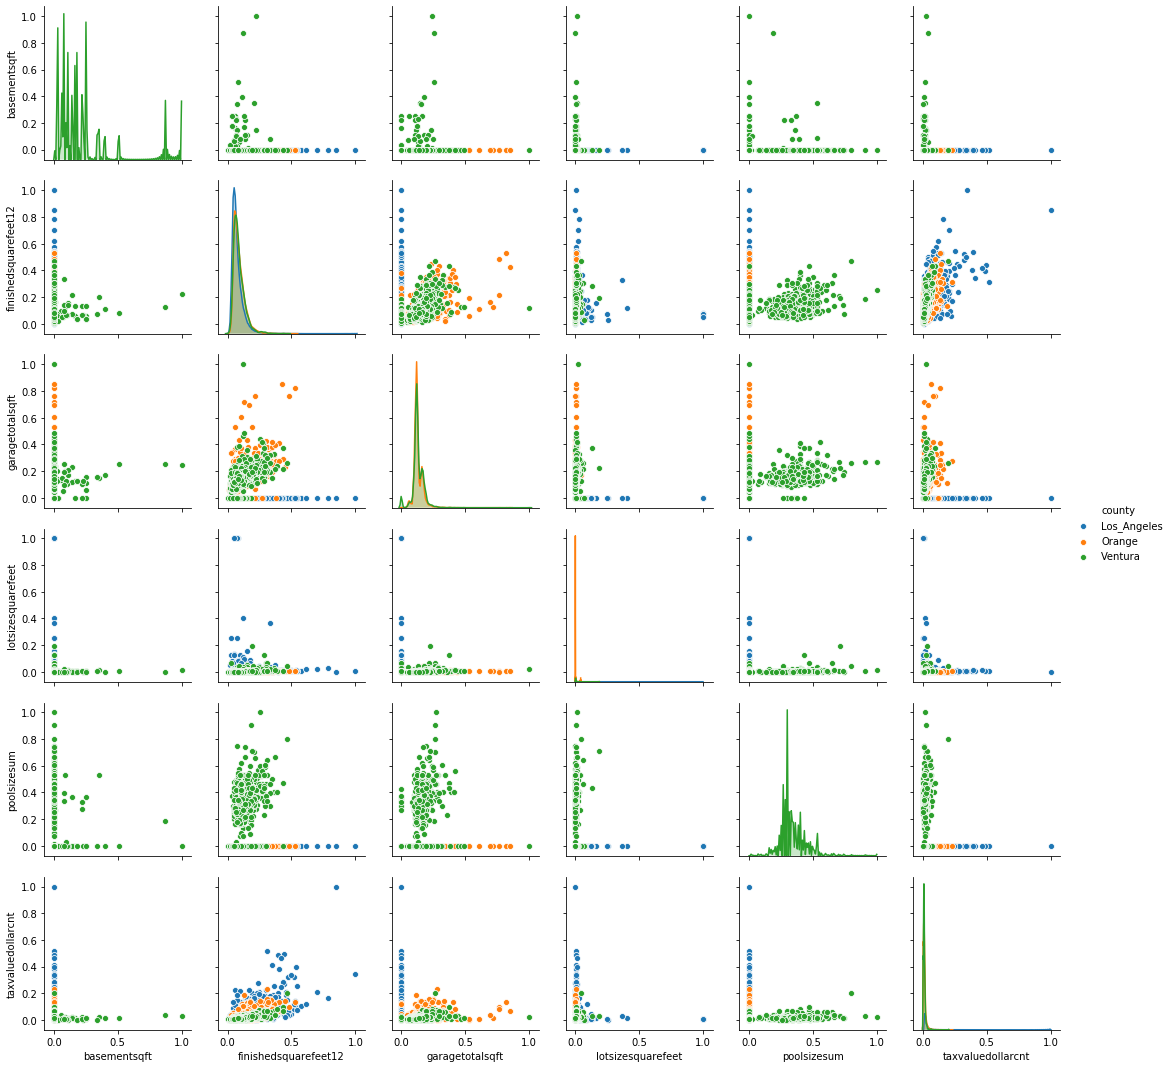

In [8]:
sns.pairplot(train[cont_vars], hue='county')

### ppl in LA county don't have:
    - basements
    - garages
    - pools
    - fireplaces
    - decks
    - airconditioning types

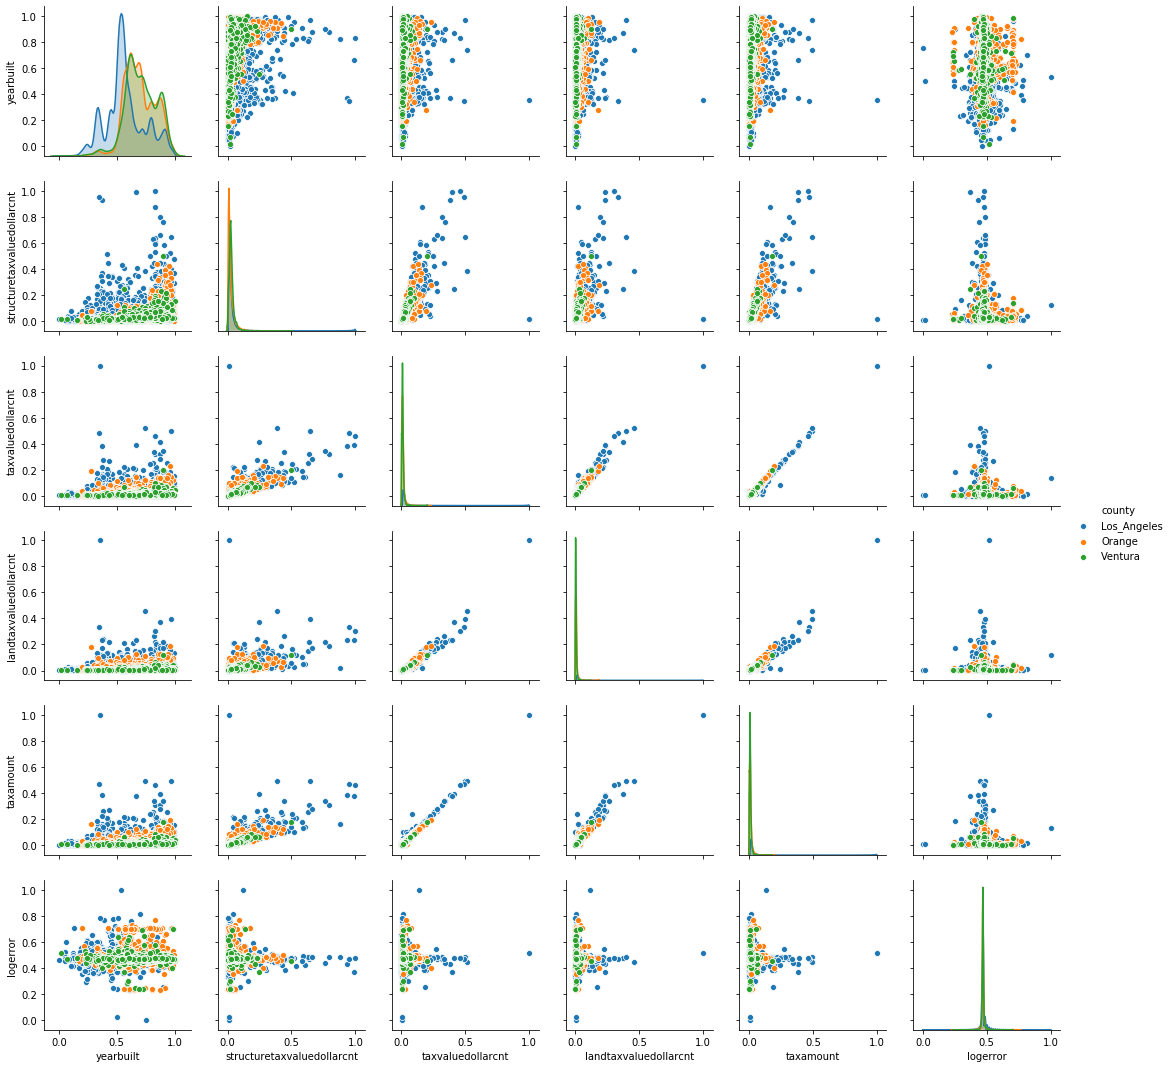

In [9]:
sns.pairplot(train[cont_vars2], hue='county')

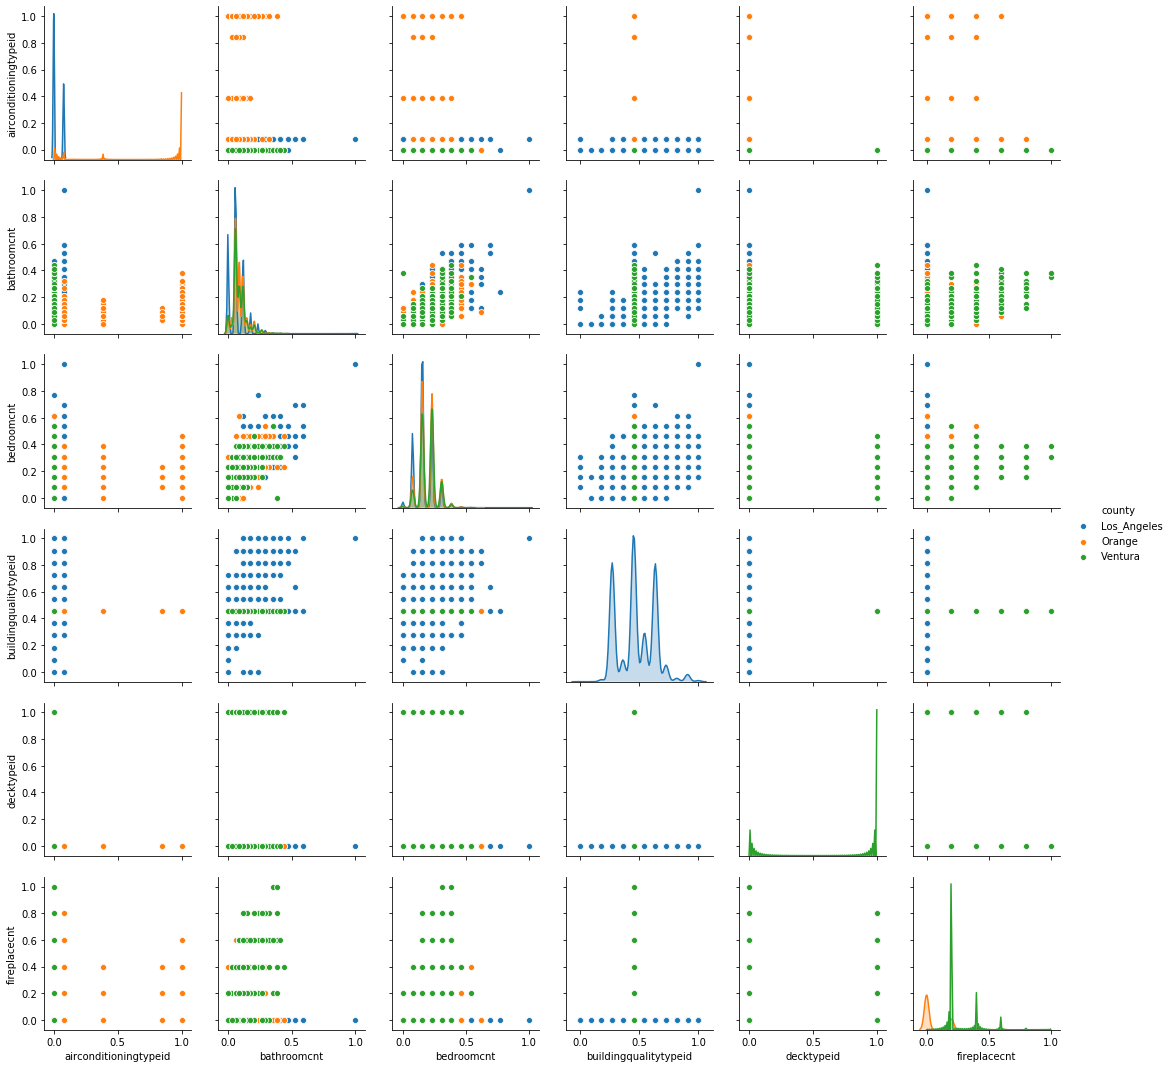

In [10]:
sns.pairplot(train[disc_vars], hue='county')

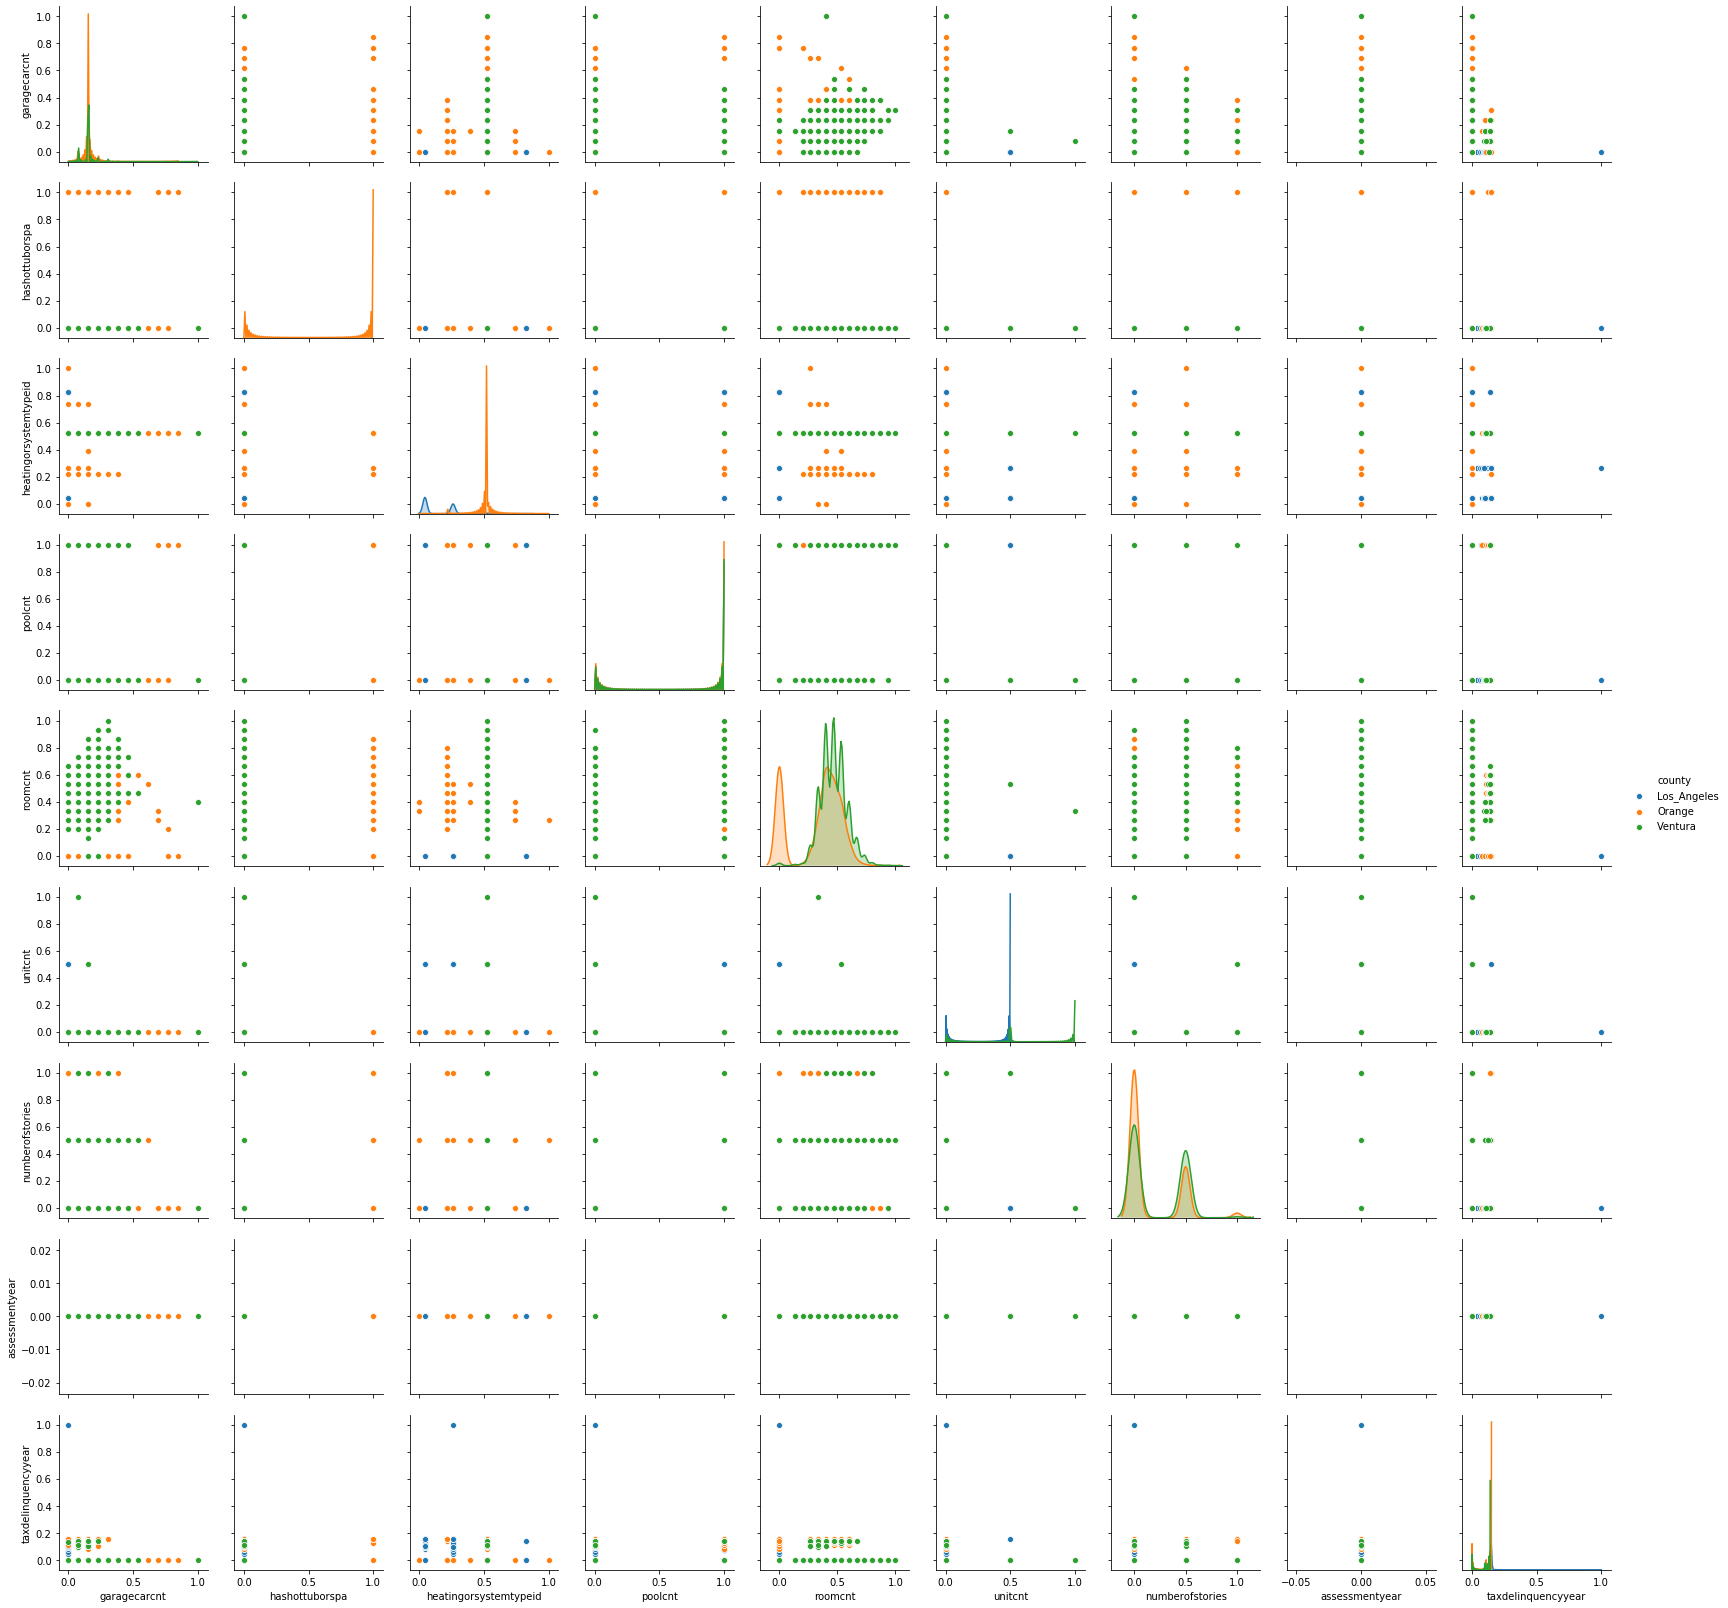

In [11]:
sns.pairplot(train[disc_vars2], hue='county')

### Plot a correlation matrix heatmap.

(6.0, 0.0)

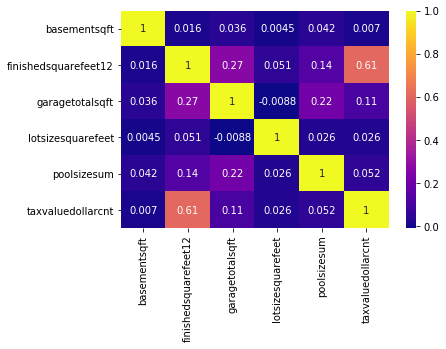

In [12]:
ax = sns.heatmap(train[cont_vars].corr(), cmap='plasma', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.0, 0.0)

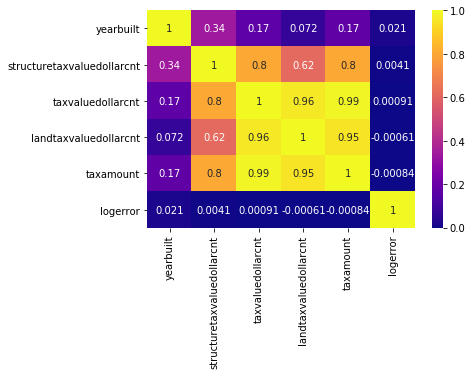

In [13]:
ax = sns.heatmap(train[cont_vars2].corr(), cmap='plasma', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.0, 0.0)

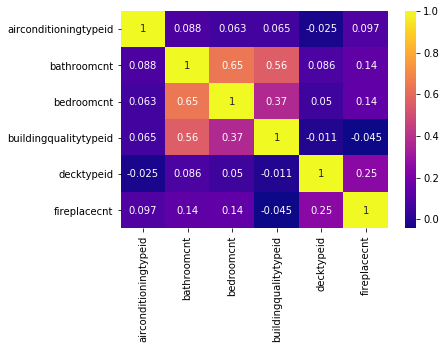

In [14]:
ax = sns.heatmap(train[disc_vars].corr(), cmap='plasma', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(9.0, 0.0)

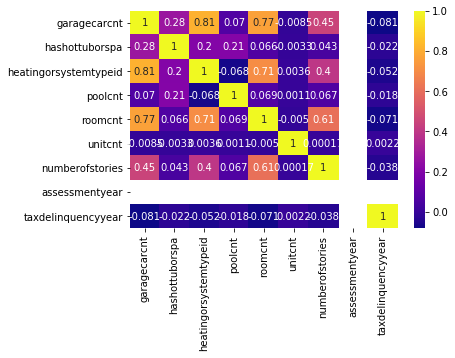

In [15]:
ax = sns.heatmap(train[disc_vars2].corr(), cmap='plasma', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Plot latitude against longitude.

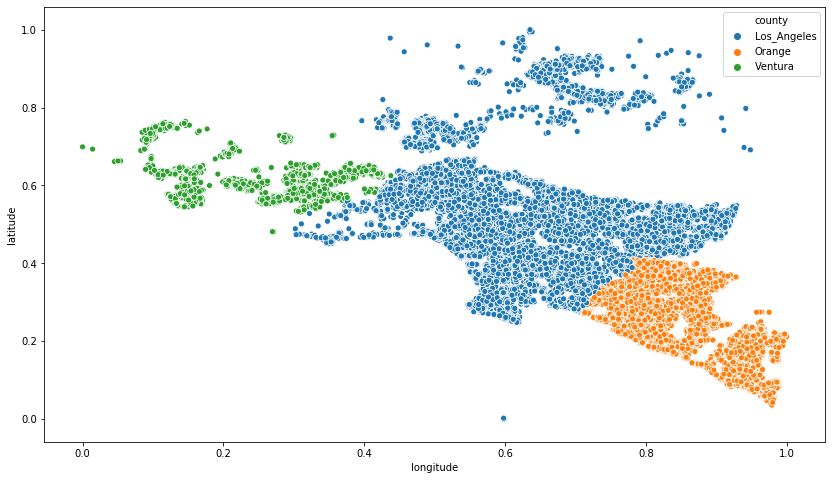

In [16]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', data=train)

### Create a useable plot with 4 dimensions, e.g. x, y, color, size.

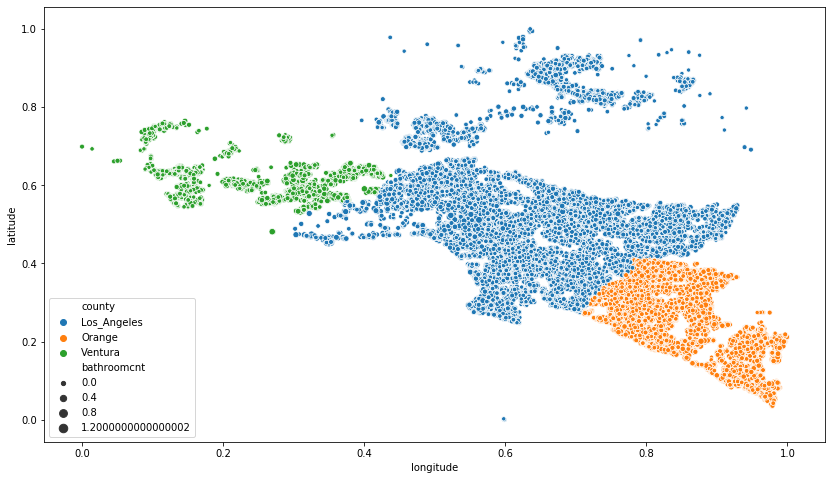

In [17]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='bathroomcnt', data=train)

### Compute the mean(logerror) by zipcode and the overall mean(logerror). 

In [18]:
population_logerror_mean = train.logerror.mean()
zip_logerror_mean = train.groupby('regionidzip')['regionidzip', 'logerror'].mean().reset_index()

In [19]:
f'{population_logerror_mean} is the error of the population'

'0.4711887938897814 is the error of the population'

In [20]:
zip_logerror_mean.head()

,regionidzip,logerror
0,"95,982.00",0.47
1,"95,983.00",0.47
2,"95,984.00",0.46
3,"95,985.00",0.47
4,"95,986.00",0.47


In [23]:
alpha = 0.01

zipcodes = train.regionidzip.unique()

zipcode = zipcodes[0]

In [24]:
# t-test
t, p = stats.ttest_1samp(train[train.regionidzip == zipcode].logerror, population_logerror_mean)

p

0.723595054496545

In [27]:
null_hypothesis = 'population logerror and logerror of this zip are the same'

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
else:
    print('Fail to reject the null hypothesis that', null_hypothesis)

Fail to reject the null hypothesis that population logerror and logerror of this zip are the same


### Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [ ]:
# If we reject the null, add that zip to list with sig different errors

In [28]:
zipcodes = train.regionidzip.unique()
zips_with_sig_different_errors = []

for zipcode in zipcodes:
    # t-test
    t, p = stats.ttest_1samp(train[train.regionidzip == zipcode].logerror, population_logerror_mean)
    if p < alpha:
        zips_with_sig_different_errors.append(zipcode)

In [29]:
zips_with_sig_different_errors

[96379.0,
 96137.0,
 96351.0,
 96387.0,
 96026.0,
 96043.0,
 96197.0,
 96120.0,
 96280.0,
 96415.0,
 96171.0,
 96237.0,
 96326.0,
 96517.0,
 96007.0,
 96047.0,
 96190.0,
 96020.0,
 95984.0,
 95989.0,
 96152.0,
 96097.0,
 96246.0,
 96946.0]

In [31]:
props_with_sig_diff_error = train[train.regionidzip.isin(zips_with_sig_different_errors)]
props_with_sig_diff_error

,parcelid,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,decktypeid,finishedsquarefeet12,fips,fireplacecnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,county
id,,,,,,,,,,,,,,,,,,,,,
1105248,0.00,0.08,0.00,0.18,0.23,0.73,0.00,0.16,"6,037.00",0.00,...,0.01,0.00,0.01,0.01,0,0.00,"60,371,394,011,007.00",0.48,2017-03-15,Los_Angeles
2374749,0.00,0.00,0.00,0.12,0.23,0.45,0.00,0.10,"6,037.00",0.00,...,0.01,0.00,0.01,0.01,0,0.00,"60,376,007,041,039.00",0.49,2017-03-23,Los_Angeles
90553,0.04,0.00,0.00,0.06,0.23,0.45,0.00,0.07,"6,111.00",0.20,...,0.00,0.00,0.00,0.00,0,0.00,"61,110,059,092,005.00",0.46,2017-05-31,Ventura
299891,0.00,0.08,0.00,0.12,0.23,0.64,0.00,0.11,"6,037.00",0.00,...,0.02,0.00,0.01,0.02,0,0.00,"60,371,374,012,011.00",0.48,2017-08-16,Los_Angeles
1510201,0.00,0.00,0.00,0.06,0.15,0.45,0.00,0.05,"6,037.00",0.00,...,0.00,0.00,0.00,0.00,0,0.00,"60,372,766,041,015.00",0.47,2017-04-27,Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401928,0.04,0.00,0.00,0.06,0.23,0.45,0.00,0.07,"6,111.00",0.20,...,0.01,0.00,0.00,0.01,0,0.00,"61,110,059,012,007.00",0.47,2017-08-31,Ventura
2840514,0.01,0.00,0.00,0.00,0.08,0.27,0.00,0.04,"6,037.00",0.00,...,0.01,0.00,0.01,0.01,0,0.00,"60,375,007,001,000.00",0.47,2017-01-31,Los_Angeles
571494,0.01,0.00,0.00,0.06,0.08,0.27,0.00,0.06,"6,037.00",0.00,...,0.00,0.00,0.00,0.01,0,0.00,"60,372,326,003,004.00",0.47,2017-08-23,Los_Angeles


### Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [32]:
la = train[train.county == 'Los_Angeles']
ventura = train[train.county == 'Ventura']
orange = train[train.county == 'Orange']

In [33]:
# H_0: LA County and Orange County have similar errors
# H_a: LA County and Orange County have significantly different errors

t, p = stats.ttest_ind(la.logerror, orange.logerror)

null_hypothesis = 'LA County and Orange County have similar errors'

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
else:
    print('Fail to reject the null hypothesis that', null_hypothesis)

Reject the null hypothesis that LA County and Orange County have similar errors


In [34]:
# H_0: LA County and Ventura County have similar errors
# H_a: LA County and Ventura County have significantly different errors

t, p = stats.ttest_ind(la.logerror, ventura.logerror)

null_hypothesis = 'LA County and Ventura County have similar errors'

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
else:
    print('Fail to reject the null hypothesis that', null_hypothesis)

Fail to reject the null hypothesis that LA County and Ventura County have similar errors


In [36]:
# H_0: Ventura County and Orange County have similar errors
# H_a: Ventura County and Orange County have significantly different errors

t, p = stats.ttest_ind(ventura.logerror, orange.logerror)

null_hypothesis = 'Ventura County and Orange County have similar errors'

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
else:
    print('Fail to reject the null hypothesis that', null_hypothesis)

Reject the null hypothesis that Ventura County and Orange County have similar errors


In [ ]:
# This means that:
# Logerror between LA County and Orange County are significantly different
# Logerror between Ventura County and Orange County are significantly different
# Logerror between LA County and Ventura County are similar